In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# activation functions
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def tanh(z):
    a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return a

def relu(z):
    a = np.maximum(0,z)
    return a

def leaky(z):
    a = np.maximum(0.01*z,z) #doing (0.01,z) is okay too
    return a

def softmax(z):
    e = np.exp(z)
    a = e/e.sum()
    return a

In [12]:
#derivatives
def dsigmoid(a):
    d = a*(1-a)
    return d

def dtanh(a):
    d = (1-a**2)
    return d

def drelu(a):
    d = (np.int64(s>0)) #s>0 creates boolean array, +ve = T, -ve = f. np.int4 converts T to 1 and F to 0
    return d

def dleaky(a,alpha = 0.01):
    d = np.where(s>0.01,1,alpha)
    return d

In [13]:
nx = 2
m=3
x = np.random.randn(2,3)
y = (np.random.randn(1,3)>0)

# forward propagation
def layers_size(x,y,node):
    nx = x.shape[0]
    nh = node
    ny = y.shape[0]
    return nx,nh,ny

def intz(nx,nh,ny):
    np.random.seed(2)
    w1 = np.random.rand(nh,nx)*0.01
    b1 = np.zeros((nh,1))
    w2 = np.random.rand(ny,nh)*0.01
    b2 = np.zeros((ny,1))
    parameters={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return parameters

def fwd(x,parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    cache={'z1':z1,'z2':z2,'a1':a1,'a2':a2}
    return a2,cache

def compute_cost(a2,y):
    m = y.shape[1]
    logp = np.multiply(np.log(a2),y) + np.multiply(np.log(1-a2),(1-y)) #logistic loss function
    cost = -np.sum(logp)/m
    cost = float(np.squeeze(cost))
    return cost
    
nx,nh,ny = layers_size(x,y,4)
parameters = intz(nx,nh,ny)
a2,cache = fwd(x,parameters)
print(parameters)
print('cost is:',compute_cost(a2,y))

{'w1': array([[0.00435995, 0.00025926],
       [0.00549662, 0.00435322],
       [0.00420368, 0.00330335],
       [0.00204649, 0.00619271]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'w2': array([[0.00299655, 0.00266827, 0.00621134, 0.00529142]]), 'b2': array([[0.]])}
cost is: 0.6931720340547977


iteration: 0 cost is: 0.693172
iteration: 100 cost is: 0.671273
iteration: 200 cost is: 0.657961
iteration: 300 cost is: 0.649822
iteration: 400 cost is: 0.644808
iteration: 500 cost is: 0.641691
iteration: 600 cost is: 0.639728
iteration: 700 cost is: 0.638456
iteration: 800 cost is: 0.637579
iteration: 900 cost is: 0.636877


{'w1': array([[ 0.01308037,  0.0022315 ],
        [ 0.04122712,  0.01288472],
        [-0.0173667 , -0.00221187],
        [-0.02160425,  0.00021953]]),
 'w2': array([[-0.01288991, -0.04283934,  0.01812845,  0.02155288]]),
 'b1': array([[ 0.00028204],
        [ 0.00317666],
        [-0.0035085 ],
        [-0.00351985]]),
 'b2': array([[-0.62429609]])}

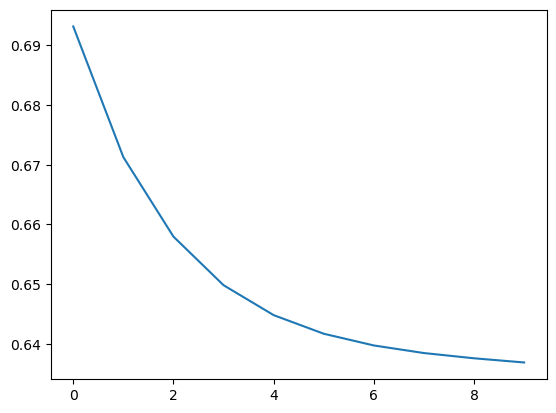

In [14]:
# Backward Propagation
def bwp(parameters,x,y,cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    a1 = cache['a1']
    a2 = cache['a2']
    m = y.shape[1]
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    db2 = np.sum(dz2,axis=1,keepdims=True)/m #axis = 1 does sum horizontally
    da1 = np.dot(w2.T,dz2)
    
    dz1 = da1*dtanh(a1) #instead of dtanh u can write (1-np.power(a1,2)) or (1-a)**2
    dw1 = np.dot(dz1,x.T)/m
    db1 = np.sum(dz1,axis=1,keepdims=True)/m
    grads = {'dw1':dw1,'dw2':dw2,'db1':db1,'db2':db2}
    return grads    

def update(parameters,grads,lr):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    
    w1 = w1 - lr * dw1
    w2 = w2 - lr * dw2
    b1 = b1 - lr * db1
    b2 = b2 - lr * db2
    
    parameters = {'w1':w1,'w2':w2,'b1':b1,'b2':b2}
    return parameters 

def nn(x,y,epoch=1000,print_cost = True, lr = 0.01):
    np.random.seed(1)
    nx,nh,ny =layers_size(x,y,4)
    parameters = intz(nx,nh,ny)
    costs = []
    for i in range(epoch):
        a2,cache = fwd(x,parameters)
        cost = compute_cost(a2,y)
        grads = bwp(parameters,x,y,cache)
        parameters = update(parameters,grads,lr)
        if print_cost and i%100 == 0:
            print("iteration: %i cost is: %f"%(i,cost))
            costs.append(cost)
    plt.plot(costs)
    return parameters
nn(x,y)